Workshop – Regression Bank Stock
Asset Class – หุ้นกลุ่มแบงค์

ดึงข้อมูลเป็นรายเดือน :

x = P/E, P/B, PEG

y = ผลตอบแทน 1 ปีข้างหน้า

Model –  Regression   และลองเลือกหุ้นมา 1 ตัว(ในกลุ่ม)เพื่อ predict ว่าจะเป็นเท่าไหร่

 

คลิ๊กที่ชื่อเพื่อ download excel file —> Bank_Data

ดูเป็นแนวทาง และไม่ต้องกลัวถูกผิดนะครับ ขอให้ลองทำก่อน

Solution https://colab.research.google.com/drive/1kMNApCfKpMLD4hJ4URVfFLTEFi6Jcfno?usp=sharing

https://academy.bottomliner.co/course/machine-learning-for-investing-101/lessons/workshop-regression-bank-stock/

In [537]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [538]:
data = pd.read_excel('./Bank_Data.xlsx', sheet_name= ['KBANK', 'SCB', 'BBL', 'BAY', 'KTB'], index_col= 'Date', parse_dates= True)

In [539]:
kbank = data['KBANK']
scb = data['SCB']
bbl = data['BBL']
bay = data['BAY']
ktb = data['KTB']

In [540]:
#### function to multiple P/E

def pe_multiple(df, symbol=''):
    #method 1, use string format
    df[('{}_multiple_P/E').format(symbol)] = df['P/E'] * df['MarketCap']

    ### method2 ใช้ string+string direcly
    #df[( symbol+ '_'+ 'P/E_weight')] = df['P/E'] * df['MarketCap']

    ### method3 use f'{df=}'.split('=')[0] 
    ######### มันเขียนเป็น df ออกมา ไม่เหมาะกับสิ่งที่ต้องการ
    #df[(f'{df=}'.split('=')[0] + 'P/E_weight')] = df['P/E'] * df['MarketCap']
    
    #df['P/E_weight'] = df['P/E'] * df['MarketCap']
    df[('{}_multiple_PEG').format(symbol)] = df['PEG'] * df['MarketCap']
    df[('{}_multiple_P/BV').format(symbol)] = df['P/BV'] * df['MarketCap']

    #### สร้าง column ใหม่ที่เป็น P/E ธรรมดา แต่แยกชื่อPE (ถ้าจะใช้เรียกsymbol คือต้องทำ header หรือ ทั้งแยกsymbol ตามrows)
    #df[('{}_P/E').format(symbol)] = df['P/E']


    return df


In [541]:
def floatpe(df):
    df['PEG'] = pd.to_numeric(df['PEG'], errors= 'coerce')
    return df

In [542]:
# change object to float
floatpe(kbank)
floatpe(scb)
floatpe(bbl)
floatpe(bay)
floatpe(ktb)

,Prior,Open,High,Low,Close,P/E,PEG,P/BV,MarketCap
Date,,,,,,,,,
2016-01-01,16.7,16.6,17.8,15.4,17.4,8.18,NaN,1.02,243183.465750
2016-02-01,17.4,17.5,18.2,17.0,17.7,8.32,NaN,1.04,247376.284125
2016-03-01,17.7,17.8,19.1,17.6,18.7,9.18,NaN,1.06,261352.345375
2016-04-01,18.7,18.6,18.6,17.1,17.5,8.59,NaN,1.00,244581.071875
2016-05-01,17.5,17.5,17.8,16.2,17.1,8.51,NaN,0.91,238990.647375
...,...,...,...,...,...,...,...,...,...
2021-06-01,10.9,10.9,11.4,10.6,10.7,9.44,-0.21,0.44,149543.855375
2021-07-01,10.7,10.6,10.9,9.9,10.1,8.91,-0.20,0.41,141158.218625
2021-08-01,10.1,10.1,11.4,10.0,11.2,9.88,-0.22,0.46,156531.886000


In [543]:
# dropna
kbank = kbank.dropna()
scb = scb.dropna()
bbl = bbl.dropna()
bay = bay.dropna()
ktb = ktb.dropna()


In [544]:
# calculate value for weighting
pe_multiple(kbank, symbol= 'kbank')
pe_multiple(scb, symbol= 'scb')
pe_multiple(bbl, symbol= 'bbl')
pe_multiple(bay, symbol= 'bay')
pe_multiple(ktb, symbol= 'ktb')

<ipython-input-540-1843135c151f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[('{}_multiple_P/E').format(symbol)] = df['P/E'] * df['MarketCap']
<ipython-input-540-1843135c151f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[('{}_multiple_PEG').format(symbol)] = df['PEG'] * df['MarketCap']
<ipython-input-540-1843135c151f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Prior,Open,High,Low,Close,P/E,PEG,P/BV,MarketCap,ktb_multiple_P/E,ktb_multiple_PEG,ktb_multiple_P/BV
Date,,,,,,,,,,,,
2018-12-01,20.20,20.40,20.60,19.10,19.20,9.89,1.20,0.90,268340.376000,2.653886e+06,322008.451200,241506.338400
2019-01-01,19.20,19.30,20.20,19.20,19.80,10.20,0.38,0.93,276726.012750,2.822605e+06,105155.884845,257355.191858
2019-02-01,19.80,19.80,20.00,19.20,19.30,9.94,0.37,0.91,269737.982125,2.681196e+06,99803.053386,245461.563734
2019-03-01,19.30,19.40,19.40,18.50,19.20,9.42,0.35,0.88,268340.376000,2.527766e+06,93919.131600,236139.530880
2019-04-01,19.20,19.20,19.60,18.70,18.90,9.27,0.23,0.86,264147.557625,2.448648e+06,60753.938254,227166.899558
2019-05-01,18.90,18.80,19.30,18.60,19.10,9.21,0.23,0.85,266942.769875,2.458543e+06,61396.837071,226901.354394
2019-06-01,19.10,19.20,19.70,19.10,19.50,9.40,0.23,0.87,272533.194375,2.561812e+06,62682.634706,237103.879106
2019-07-01,19.50,19.60,20.00,19.10,19.60,9.45,0.55,0.87,273930.800500,2.588646e+06,150661.940275,238319.796435
2019-08-01,19.60,19.60,19.60,16.40,17.20,8.16,0.48,0.76,240388.253500,1.961568e+06,115386.361680,182695.072660


In [545]:
# rename ค่าให้เป็นตามชื่อหุ้น

kbank.rename(
    columns={
        'P/E' : 'kbank_P/E',
        'PEG': 'kbank_PEG',
        'P/BV': 'kbank_P/BV'
    },
    inplace= True)

scb.rename(
    columns={
        'P/E' : 'scb_P/E',
        'PEG': 'scb_PEG',
        'P/BV': 'scb_P/BV'
    },
    inplace= True)

bbl.rename(
    columns={
        'P/E' : 'bbl_P/E',
        'PEG': 'bbl_PEG',
        'P/BV': 'bbl_P/BV'
    },
    inplace= True)

bay.rename(
    columns={
        'P/E' : 'bay_P/E',
        'PEG': 'bay_PEG',
        'P/BV': 'bay_P/BV'
    },
    inplace= True)

ktb.rename(
    columns={
        'P/E' : 'ktb_P/E',
        'PEG': 'ktb_PEG',
        'P/BV': 'ktb_P/BV'
    },
    inplace= True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [546]:
# รวม data เพื่อจะนำพวก pe มาหาค่าเฉลี่ย
big_df = pd.concat([kbank, scb, bbl, bay, ktb], axis= 1)

In [547]:
# function to devided ratio by avg marketcap
####  ฟังค์ชั่นในส่วน preprocessing หลังจาก concat เป็น bigframe 


def devide_marketcap(big_df, symbol= ''):
    #marketcap mean
    big_df['total_marketcap'] = big_df['MarketCap'].sum(axis=1)
    
    ### multiple PE / avg marketcap
    big_df[('{}_P/E_weighted').format(symbol)] = big_df[('{}_multiple_P/E').format(symbol)] / big_df['total_marketcap']
    big_df[('{}_PEG_weighted').format(symbol)] = big_df[('{}_multiple_PEG').format(symbol)] / big_df['total_marketcap']    
    big_df[('{}_P/BV_weighted').format(symbol)] = big_df[('{}_multiple_P/BV').format(symbol)] / big_df['total_marketcap']
    
    return big_df
# ได้weight pd ของหุ้นที่ต้องการแล้ว แต่ยังไม่มี sector pe index

In [548]:
"""data_big['kbank_P/E_weighted'] = data_big['kbank_multiple_P/E'] /data_big['avg_marketCap']
data_big['kbank_PEG_weighted'] = data_big['kbank_multiple_PEG'] /data_big['avg_marketCap']
P/BV"""

"data_big['kbank_P/E_weighted'] = data_big['kbank_multiple_P/E'] /data_big['avg_marketCap']\ndata_big['kbank_PEG_weighted'] = data_big['kbank_multiple_PEG'] /data_big['avg_marketCap']\nP/BV"

In [549]:
# weight selected stock

devide_marketcap(big_df, symbol= 'kbank')
devide_marketcap(big_df, symbol= 'scb')
devide_marketcap(big_df, symbol= 'bbl')
devide_marketcap(big_df, symbol= 'bay')
devide_marketcap(big_df, symbol= 'ktb')

,Prior,Open,High,Low,Close,kbank_P/E,kbank_PEG,kbank_P/BV,MarketCap,kbank_multiple_P/E,...,scb_P/BV_weighted,bbl_P/E_weighted,bbl_PEG_weighted,bbl_P/BV_weighted,bay_P/E_weighted,bay_PEG_weighted,bay_P/BV_weighted,ktb_P/E_weighted,ktb_PEG_weighted,ktb_P/BV_weighted
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,193.50,197.00,199.00,182.00,185.00,11.92,-2.66,1.19,442753.135705,5.277617e+06,...,0.301663,2.293380,0.255759,0.202917,1.771108,0.236352,0.182636,1.447646,0.175650,0.131737
2019-01-01,185.00,185.00,200.00,178.50,200.00,12.89,1.07,1.29,478652.038600,6.169825e+06,...,0.288069,2.485902,0.352656,0.218517,1.688695,0.244610,0.173880,1.488009,0.055436,0.135671
2019-02-01,200.00,201.00,205.00,193.50,197.50,12.73,1.06,1.28,472668.888117,6.017075e+06,...,0.290494,2.396385,0.341734,0.205890,1.750817,0.253130,0.180807,1.426509,0.053099,0.130596
2019-03-01,197.50,197.00,197.50,186.50,187.50,11.67,0.97,1.19,448736.286187,5.236752e+06,...,0.288601,2.410572,0.342827,0.206990,1.629197,0.236137,0.166336,1.379350,0.051250,0.128857
2019-04-01,187.50,188.50,193.50,186.50,191.00,11.89,1.48,1.21,457112.696863,5.435070e+06,...,0.283341,2.314297,0.474674,0.198308,1.759221,0.055506,0.180393,1.333130,0.033077,0.123678
2019-05-01,191.00,191.50,193.00,182.50,186.50,11.83,1.47,1.14,446343.025995,5.280238e+06,...,0.273844,2.212878,0.452587,0.183538,1.297195,0.040584,0.159331,1.367059,0.034139,0.126167
2019-06-01,186.50,187.00,194.00,186.50,188.00,11.92,1.48,1.15,449932.916284,5.363200e+06,...,0.308911,2.156478,0.441835,0.178355,1.379825,0.042738,0.169425,1.380748,0.033784,0.127793
2019-07-01,188.00,189.50,191.00,172.00,172.50,10.94,-35.62,1.05,412837.383292,4.516441e+06,...,0.310593,1.898039,1.016806,0.156879,1.486480,0.045192,0.182380,1.447121,0.084224,0.133227
2019-08-01,172.50,172.00,176.00,152.50,160.00,10.42,-33.92,0.98,382921.630880,3.990043e+06,...,0.273289,1.844256,0.987350,0.154524,1.271015,0.039571,0.156701,1.205988,0.070940,0.112322


In [550]:
big_df.columns

Index(['Prior', 'Open', 'High', 'Low', 'Close', 'kbank_P/E', 'kbank_PEG',
       'kbank_P/BV', 'MarketCap', 'kbank_multiple_P/E', 'kbank_multiple_PEG',
       'kbank_multiple_P/BV', 'Prior', 'Open', 'High', 'Low', 'Close',
       'scb_P/E', 'scb_PEG', 'scb_P/BV', 'MarketCap', 'scb_multiple_P/E',
       'scb_multiple_PEG', 'scb_multiple_P/BV', 'Prior', 'Open', 'High', 'Low',
       'Close', 'bbl_P/E', 'bbl_PEG', 'bbl_P/BV', 'MarketCap',
       'bbl_multiple_P/E', 'bbl_multiple_PEG', 'bbl_multiple_P/BV', 'Prior',
       'Open', 'High', 'Low', 'Close', 'bay_P/E', 'bay_PEG', 'bay_P/BV',
       'MarketCap', 'bay_multiple_P/E', 'bay_multiple_PEG',
       'bay_multiple_P/BV', 'Prior', 'Open', 'High', 'Low', 'Close', 'ktb_P/E',
       'ktb_PEG', 'ktb_P/BV', 'MarketCap', 'ktb_multiple_P/E',
       'ktb_multiple_PEG', 'ktb_multiple_P/BV', 'total_marketcap',
       'kbank_P/E_weighted', 'kbank_PEG_weighted', 'kbank_P/BV_weighted',
       'scb_P/E_weighted', 'scb_PEG_weighted', 'scb_P/BV_weighted'

In [551]:
##### weighted average 
## เอาแต่ละ หุ้น ที่เวทแล้ว มาเฉลี่ยกัน จะได้เป็น sector index ของ pe,peg,pbv
big_df['avg_P/E'] = (big_df['kbank_P/E_weighted'] + big_df['scb_P/E_weighted'] + big_df['bbl_P/E_weighted'] + big_df['bay_P/E_weighted'] + big_df['ktb_P/E_weighted'])
big_df['avg_PEG'] = (big_df['kbank_PEG_weighted'] + big_df['scb_PEG_weighted'] + big_df['bbl_PEG_weighted'] + big_df['bay_PEG_weighted'] + big_df['ktb_PEG_weighted'])
big_df['avg_P/BV'] = (big_df['kbank_P/BV_weighted'] + big_df['scb_P/BV_weighted'] + big_df['bbl_P/BV_weighted'] + big_df['bay_P/BV_weighted'] + big_df['ktb_P/BV_weighted'])
# ไม่ต้อง ทำเป็น mean แล้ว แค่เอามารวมกัน เพราะทุกตัวหารด้วย marketcap รวมมาแล้ว

In [552]:
big_df.head()

,Prior,Open,High,Low,Close,kbank_P/E,kbank_PEG,kbank_P/BV,MarketCap,kbank_multiple_P/E,...,bbl_P/BV_weighted,bay_P/E_weighted,bay_PEG_weighted,bay_P/BV_weighted,ktb_P/E_weighted,ktb_PEG_weighted,ktb_P/BV_weighted,avg_P/E,avg_PEG,avg_P/BV
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,193.5,197.0,199.0,182.0,185.0,11.92,-2.66,1.19,442753.135705,5.277617e+06,...,0.202917,1.771108,0.236352,0.182636,1.447646,0.175650,0.131737,11.051544,-0.251601,1.106354
2019-01-01,185.0,185.0,200.0,178.5,200.0,12.89,1.07,1.29,478652.038600,6.169825e+06,...,0.218517,1.688695,0.244610,0.173880,1.488009,0.055436,0.135671,11.467340,0.565589,1.141648
2019-02-01,200.0,201.0,205.0,193.5,197.5,12.73,1.06,1.28,472668.888117,6.017075e+06,...,0.205890,1.750817,0.253130,0.180807,1.426509,0.053099,0.130596,11.527478,0.529628,1.129681
2019-03-01,197.5,197.0,197.5,186.5,187.5,11.67,0.97,1.19,448736.286187,5.236752e+06,...,0.206990,1.629197,0.236137,0.166336,1.379350,0.051250,0.128857,11.015975,0.483748,1.082174
2019-04-01,187.5,188.5,193.5,186.5,191.0,11.89,1.48,1.21,457112.696863,5.435070e+06,...,0.198308,1.759221,0.055506,0.180393,1.333130,0.033077,0.123678,11.056224,0.689409,1.086851


# Label Encoding

In [553]:
big_df[[ 'kbank_P/E', 'avg_P/E', 'kbank_PEG', 'avg_PEG', 'kbank_P/BV', 'avg_P/BV']]

,kbank_P/E,avg_P/E,kbank_PEG,avg_PEG,kbank_P/BV,avg_P/BV
Date,,,,,,
2018-12-01,11.92,11.051544,-2.66,-0.251601,1.19,1.106354
2019-01-01,12.89,11.467340,1.07,0.565589,1.29,1.141648
2019-02-01,12.73,11.527478,1.06,0.529628,1.28,1.129681
2019-03-01,11.67,11.015975,0.97,0.483748,1.19,1.082174
2019-04-01,11.89,11.056224,1.48,0.689409,1.21,1.086851
2019-05-01,11.83,10.656758,1.47,0.637861,1.14,1.025813
2019-06-01,11.92,11.004005,1.48,0.591326,1.15,1.063361
2019-07-01,10.94,10.579832,-35.62,-7.405881,1.05,1.025405
2019-08-01,10.42,9.643906,-33.92,-7.181612,0.98,0.927551


In [554]:
# define function for loop label encoding
# เขียน function เพื่อทำ label encode

##### !!!! แก้เป็นไม่ใช่ตาม percentile เพราะตัวเลข พวก pctile บนล่างมันจะมีพวกตัวเลขโดดๆๆๆ
##### ไปดูใน note (day6 tips) ว่าใช้อะไรเท่าไหร่ดี

def pe(pe): # ชื่อ func pe และ args ใช้เป็น pe ที่ใส่เข้าไป
    if pe <= 5:
        return 1
    elif (pe > 5) & (pe <= 10):
        return 2
    elif (pe > 10) & (pe <= 20):
        return 3
    elif (pe > 20) & (pe <= 35):
        return 4
    elif (pe > 35) & (pe <= 50):
        return 5    
    else:
        return 6

In [555]:
def peg(peg):
    if peg <= 0:
        return -1
    elif (peg > 0) & (peg <= 3):
        return 1
    elif (peg > 3) & (peg <= 6):
        return 2
    else:
        return 3

In [556]:
def pbv(pbv):
    if pbv <= 0.8:
        return -1
    elif (pbv > 0.8) & (pbv <= 1):
        return 1
    elif (pbv > 1) & (pbv <= 1.2):
        return 2
    elif (pbv > 1.2) & (pbv <= 1.5):
        return 3
    else:
        return 4

In [557]:
## apply encoded data to dataframe
# เขียน function lebel stock ข้างบน และเอามาเลเบลข้างล่าง

big_df['enc_pe_sector'] = big_df['avg_P/E'].apply(pe)
big_df['enc_peg_sector'] = big_df['avg_PEG'].apply(peg)
big_df['enc_pbv_sector'] = big_df['avg_P/BV'].apply(pbv)

big_df['enc_pe_scb'] = big_df['scb_P/E'].apply(pe)
big_df['enc_peg_scb'] = big_df['scb_PEG'].apply(peg)
big_df['enc_pbv_scb'] = big_df['scb_P/BV'].apply(pbv)

In [558]:
## add pct_change to dataframe

big_df['scb_close'] = scb.Close

In [559]:
big_df['scb_shift12m'] = big_df['scb_close'].shift(-12)
big_df['scb_ret12m'] = big_df['scb_shift12m'] / big_df['scb_close'] - 1

# 9.30am 16/01 เพิ่งแก้ shift เสร็จเป็น return ของ 

In [560]:
big_df = big_df.dropna()

In [561]:
big_df.columns

Index(['Prior', 'Open', 'High', 'Low', 'Close', 'kbank_P/E', 'kbank_PEG',
       'kbank_P/BV', 'MarketCap', 'kbank_multiple_P/E', 'kbank_multiple_PEG',
       'kbank_multiple_P/BV', 'Prior', 'Open', 'High', 'Low', 'Close',
       'scb_P/E', 'scb_PEG', 'scb_P/BV', 'MarketCap', 'scb_multiple_P/E',
       'scb_multiple_PEG', 'scb_multiple_P/BV', 'Prior', 'Open', 'High', 'Low',
       'Close', 'bbl_P/E', 'bbl_PEG', 'bbl_P/BV', 'MarketCap',
       'bbl_multiple_P/E', 'bbl_multiple_PEG', 'bbl_multiple_P/BV', 'Prior',
       'Open', 'High', 'Low', 'Close', 'bay_P/E', 'bay_PEG', 'bay_P/BV',
       'MarketCap', 'bay_multiple_P/E', 'bay_multiple_PEG',
       'bay_multiple_P/BV', 'Prior', 'Open', 'High', 'Low', 'Close', 'ktb_P/E',
       'ktb_PEG', 'ktb_P/BV', 'MarketCap', 'ktb_multiple_P/E',
       'ktb_multiple_PEG', 'ktb_multiple_P/BV', 'total_marketcap',
       'kbank_P/E_weighted', 'kbank_PEG_weighted', 'kbank_P/BV_weighted',
       'scb_P/E_weighted', 'scb_PEG_weighted', 'scb_P/BV_weighted'

In [562]:
#df_for_xy = big_df[['avg_P/E', 'avg_PEG', 'avg_P/BV', 'enc_pe_sector', 'enc_peg_sector', 'enc_pbv_sector', 'scb_ret12m']]
df_for_xy = big_df[
    ['avg_P/E', 'avg_PEG', 'avg_P/BV', 'enc_pe_sector', 'enc_peg_sector', 'enc_pbv_sector',
    'scb_P/E', 'scb_PEG', 'scb_P/BV', 
    'enc_pe_scb', 'enc_peg_scb', 'enc_pbv_scb',
    'scb_ret12m']]

In [563]:
df_for_xy

,avg_P/E,avg_PEG,avg_P/BV,enc_pe_sector,enc_peg_sector,enc_pbv_sector,scb_P/E,scb_PEG,scb_P/BV,enc_pe_scb,enc_peg_scb,enc_pbv_scb,scb_ret12m
Date,,,,,,,,,,,,,
2018-12-01,11.051544,-0.251601,1.106354,3,-1,2,10.76,-1.12,1.22,3,-1,3,-0.086142
2019-01-01,11.467340,0.565589,1.141648,3,1,2,10.72,-1.50,1.21,3,-1,3,-0.263158
2019-02-01,11.527478,0.529628,1.129681,3,1,2,11.37,-1.59,1.20,3,-1,2,-0.348881
2019-03-01,11.015975,0.483748,1.082174,3,1,2,11.20,-1.57,1.18,3,-1,2,-0.475379
2019-04-01,11.056224,0.689409,1.086851,3,1,2,11.11,-1.00,1.17,3,-1,2,-0.477099
2019-05-01,10.656758,0.637861,1.025813,3,1,2,11.63,-1.04,1.12,3,-1,2,-0.428571
2019-06-01,11.004005,0.591326,1.063361,3,1,2,12.52,-1.12,1.21,3,-1,3,-0.480287
2019-07-01,10.579832,-7.405881,1.025405,3,-1,2,12.35,-1.27,1.19,3,-1,2,-0.512727
2019-08-01,9.643906,-7.181612,0.927551,2,-1,1,11.13,-1.14,1.06,3,-1,2,-0.412955


In [564]:
X = df_for_xy.iloc[:14, :-1]
y = df_for_xy.iloc[:14, -1:]

In [565]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [567]:
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=2)
scores

array([   -1.79024299, -1621.74862599])

In [568]:
model = LinearRegression()
reg = model.fit(X_train, y_train)

In [569]:
y_pred = reg.predict(X_test)

In [570]:
reg.score(X_test, y_test)

-141.26121713824338

In [571]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
metrics.r2_score(y_test, y_pred)

MAE =  0.6948277554062939
MSE =  1.3371267738269605
RMSE =  1.156341979618037


-141.26121713824338

In [572]:
live_data = reg.predict(df_for_xy.iloc[14:, :-1])

In [573]:
test = df_for_xy.iloc[14:]

In [574]:
test['pred'] = live_data

<ipython-input-574-28c92657f09a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = live_data


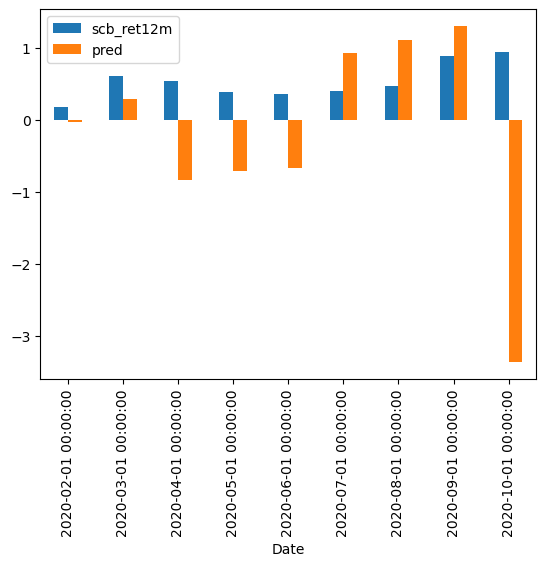

In [575]:
test.iloc[:, -2:].plot(kind= 'bar')
plt.show()

In [576]:
test

,avg_P/E,avg_PEG,avg_P/BV,enc_pe_sector,enc_peg_sector,enc_pbv_sector,scb_P/E,scb_PEG,scb_P/BV,enc_pe_scb,enc_peg_scb,enc_pbv_scb,scb_ret12m,pred
Date,,,,,,,,,,,,,,
2020-02-01,6.928339,5.915122,0.660961,2,2,-1,7.33,7.96,0.74,2,3,-1,0.180516,-0.033072
2020-03-01,5.382359,4.579161,0.517095,2,2,-1,5.82,6.32,0.59,2,3,-1,0.610108,0.280601
2020-04-01,5.375068,-0.753443,0.518186,2,-1,-1,5.76,0.82,0.58,2,1,-1,0.532847,-0.834528
2020-05-01,6.049985,-0.961201,0.558413,2,-1,-1,6.21,0.88,0.64,2,1,-1,0.385135,-0.708807
2020-06-01,5.963339,-0.949973,0.548631,2,-1,-1,6.08,0.86,0.62,2,1,-1,0.351724,-0.666128
2020-07-01,5.454782,2.593719,0.505078,2,1,-1,5.62,11.10,0.58,2,3,-1,0.395522,0.928099
2020-08-01,6.537997,3.117105,0.517356,2,2,-1,6.50,12.84,0.61,2,3,-1,0.468966,1.108440
2020-09-01,5.935565,2.755148,0.467908,2,1,-1,5.83,11.51,0.55,2,3,-1,0.876923,1.295709
2020-10-01,5.893353,-0.197881,0.464896,2,-1,-1,5.83,-0.17,0.55,2,-1,-1,0.938462,-3.371288
